In [30]:
import numpy as np
from scipy.stats import norm
class BlackScholesModel: #Class = regroupe données et fonctions
    def __init__(self, S0, K, T, r, sigma):
        self.S0 = S0 # prix SJ
        self.K = K # prix exercice
        self.T = T # temps
        self.r = r # ASR
        self.sigma = sigma # Vol
    def d1(self):
        return (np.log(self.S0 / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))
    def d2(self):
        return self.d1() - self.sigma * np.sqrt(self.T)
    def call_option_price(self):
        d1 = self.d1()
        d2 = self.d2()
        return self.S0 * norm.cdf(d1) - self.K * np.exp(-self.r * self.T) * norm.cdf(d2)
    def put_option_price(self):
        d1 = self.d1()
        d2 = self.d2()
        return self.K * np.exp(-self.r * self.T) * norm.cdf(-d2) - self.S0 * norm.cdf(-d1)

Formule de calcul du B&S modèle pour une option européenne

In [31]:
## Teste 
S0 = 100
K = 90
T = 0.7
r = 0.05
sigma = 0.2

bsm = BlackScholesModel(S0, K, T, r, sigma)

callp = bsm.call_option_price()
putp = bsm.put_option_price()

print(f"Le prix de l'option call est : {callp:.2f}")
print(f"Le prix de l'option put est : {putp:.2f}")

Le prix de l'option call est : 14.84
Le prix de l'option put est : 1.75


[*********************100%%**********************]  3 of 3 completed


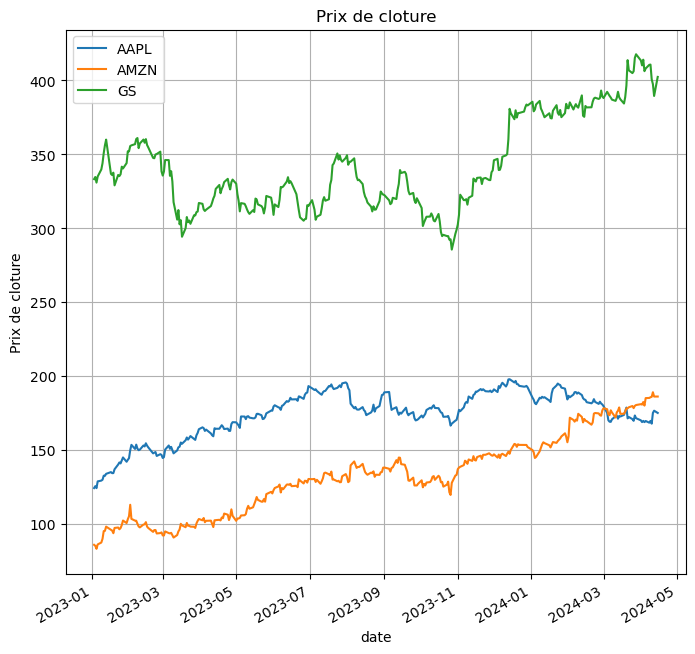

In [32]:
import yfinance as yf
tickers = ['AAPL', 'AMZN', 'GS'] #importe des données
data = yf.download(tickers, start ="2023-01-01", end="2024-04-30")
adj_close_prices = data['Adj Close'] #prix de cloture ajusté

import matplotlib.pyplot as plt
#Pour visualiser le prix de fermuture
adj_close_prices.plot(figsize=(8, 8))
plt.title('Prix de cloture')
plt.xlabel('date')
plt.ylabel('Prix de cloture')
plt.legend(tickers)
plt.grid(True) #Afficher les grilles

In [33]:
##On rentre les paramètres :
# Calcul de la vol historique :
def calculate_historical_volatility(prices, window=252):
    log_returns = np.log(prices / prices.shift(1))
    daily_std = np.std(log_returns)
    annualized_std = daily_std * np.sqrt(window)
    return annualized_std

historical_volatility = adj_close_prices.apply(calculate_historical_volatility)
print(historical_volatility)
# ASR :
risk_free_rate = 0.03

#Création d'une base pour y ranger les résultats
option_prix_call = {}
option_prix_put = {}

Ticker
AAPL    0.203275
AMZN    0.312805
GS      0.232209
dtype: float64


In [38]:
##Calcul :
for ticker in tickers:
    S0 = adj_close_prices[ticker].iloc[-1] #prix SJ
    K = S0 + 10
    sigma = historical_volatility[ticker] #Calcul de la vol
    bsm2 = BlackScholesModel(S0, K, T, r, sigma)
    option_prix_call[ticker] = bsm2.call_option_price()
    option_prix_put[ticker] = bsm2.put_option_price()
print(option_prix_call)
print(option_prix_put)    

{'AAPL': 10.254595142742701, 'AMZN': 17.96362640867146, 'GS': 33.111825556213745}
{'AAPL': 13.890221597963489, 'AMZN': 21.21764491528434, 'GS': 28.928531226288754}


Text(0, 0.5, 'prix du put')

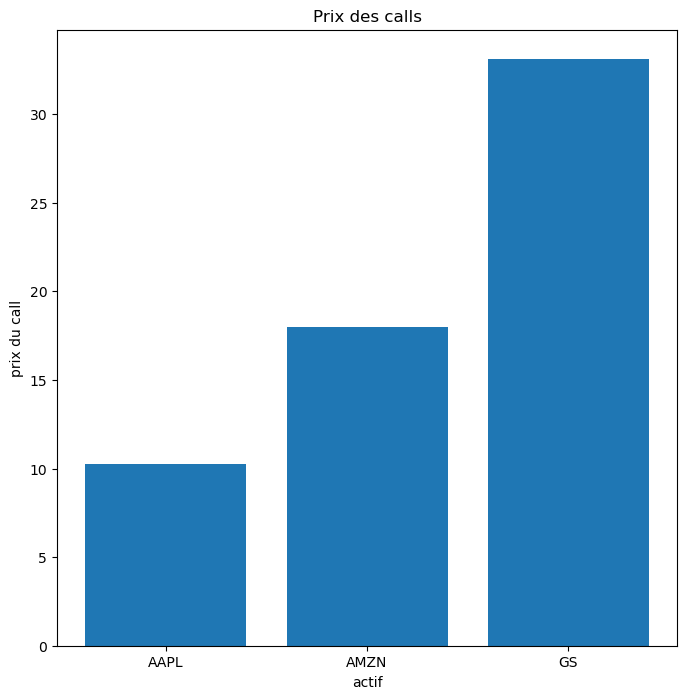

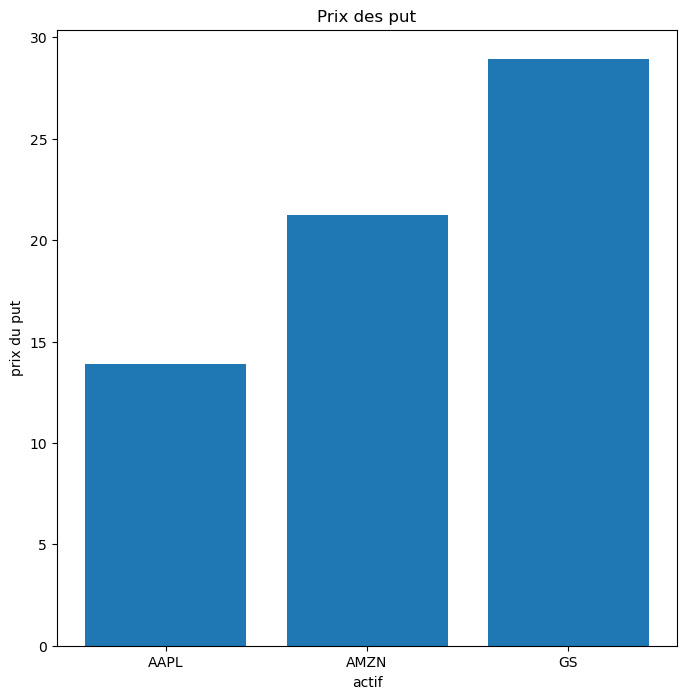

In [39]:
##Graphique des prix en histogram :
plt.figure(figsize=(8, 8))
plt.bar(option_prix_call.keys(), option_prix_call.values())
plt.title('Prix des calls')
plt.xlabel('actif')
plt.ylabel('prix du call')

plt.figure(figsize=(8, 8))
plt.bar(option_prix_put.keys(), option_prix_put.values())
plt.title('Prix des put')
plt.xlabel('actif')
plt.ylabel('prix du put')